# Home Bakery Sales Analysis

## Import Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv('home_bakery_sales_data.csv')

In [3]:
df

,Order_ID,Order_Date,Product,Quantity,Unit_Price,Discount(%),Customer_City,Payment_Mode,Delivery_Status
0,1001,2025-03-18,Vanilla Cupcake,4,100,0,Delhi,Card,Delivered
1,1002,2025-04-24,Choco Chip Cookie,5,80,20,Kanpur,Card,Delivered
2,1003,2024-11-24,Jar Cake,4,250,20,Mumbai,Cash on Delivery,Delivered
3,1004,2024-11-16,Jar Cake,3,250,0,Lucknow,UPI,Pending
4,1005,2024-12-28,Brownie,2,150,15,Gurgaon,Cash on Delivery,Delivered
...,...,...,...,...,...,...,...,...,...
995,1996,2025-01-21,Choco Chip Cookie,4,80,0,Lucknow,Card,Delivered
996,1997,2025-01-30,Brownie,2,150,10,Gurgaon,Online,Delivered
997,1998,2024-12-01,Chocolate Cake,4,400,20,Mumbai,UPI,Pending
998,1999,2025-03-07,Chocolate Cake,1,400,10,Noida,UPI,Delivered


## Basic Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Order_ID         1000 non-null   int64 
 1   Order_Date       1000 non-null   object
 2   Product          1000 non-null   object
 3   Quantity         1000 non-null   int64 
 4   Unit_Price       1000 non-null   int64 
 5   Discount(%)      1000 non-null   int64 
 6   Customer_City    1000 non-null   object
 7   Payment_Mode     1000 non-null   object
 8   Delivery_Status  1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Order_ID,Quantity,Unit_Price,Discount(%)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1500.500000,3.015000,210.060000,10.280000
std,288.819436,1.384446,116.004541,7.090266
min,1001.000000,1.000000,80.000000,0.000000
25%,1250.750000,2.000000,100.000000,5.000000
50%,1500.500000,3.000000,150.000000,10.000000
75%,1750.250000,4.000000,300.000000,15.000000
max,2000.000000,5.000000,400.000000,20.000000


## Analyze Data

In [17]:
df['Sales'] = df['Quantity'] * df['Unit_Price']
df

,Order_ID,Order_Date,Product,Quantity,Unit_Price,Discount(%),Customer_City,Payment_Mode,Delivery_Status,Sales
0,1001,2025-03-18,Vanilla Cupcake,4,100,0,Delhi,Card,Delivered,400
1,1002,2025-04-24,Choco Chip Cookie,5,80,20,Kanpur,Card,Delivered,400
2,1003,2024-11-24,Jar Cake,4,250,20,Mumbai,Cash on Delivery,Delivered,1000
3,1004,2024-11-16,Jar Cake,3,250,0,Lucknow,UPI,Pending,750
4,1005,2024-12-28,Brownie,2,150,15,Gurgaon,Cash on Delivery,Delivered,300
...,...,...,...,...,...,...,...,...,...,...
995,1996,2025-01-21,Choco Chip Cookie,4,80,0,Lucknow,Card,Delivered,320
996,1997,2025-01-30,Brownie,2,150,10,Gurgaon,Online,Delivered,300
997,1998,2024-12-01,Chocolate Cake,4,400,20,Mumbai,UPI,Pending,1600
998,1999,2025-03-07,Chocolate Cake,1,400,10,Noida,UPI,Delivered,400


In [19]:
df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

Product
Chocolate Cake       192400
Chocolate Truffle    153300
Jar Cake             115250
Brownie               72300
Vanilla Cupcake       49800
Choco Chip Cookie     46560
Name: Sales, dtype: int64

## Visualize Insights

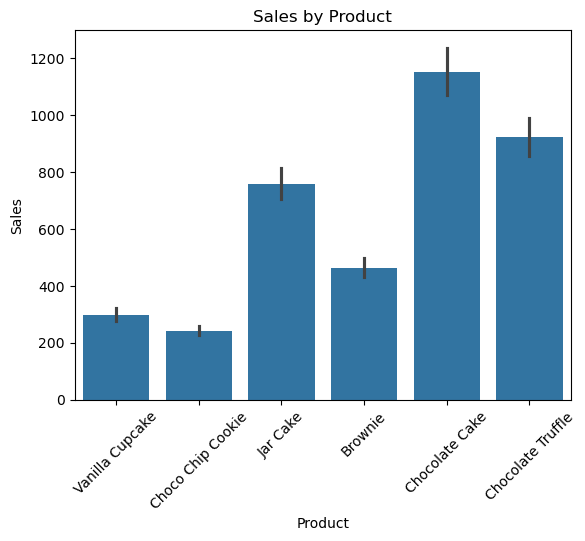

In [20]:
plt.figure()
sns.barplot(data=df, x='Product', y='Sales')
plt.title('Sales by Product')
plt.xticks(rotation=45)
plt.show()

## Key Insight
    > Chocolate Cake and Truffle are leading in sales. 
    > Brownie, Vanilla Cupcake and Choco Chip Cookie are the least-selling products.
    > To increase the least-selling product sales, we suggest to offer combos(Chocolate Cake+Cookies) for cross-selling.